## Data Cleaning 3: outliers
### US Education dataset

In [38]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

### Upload data from sql

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


### Question 1

Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

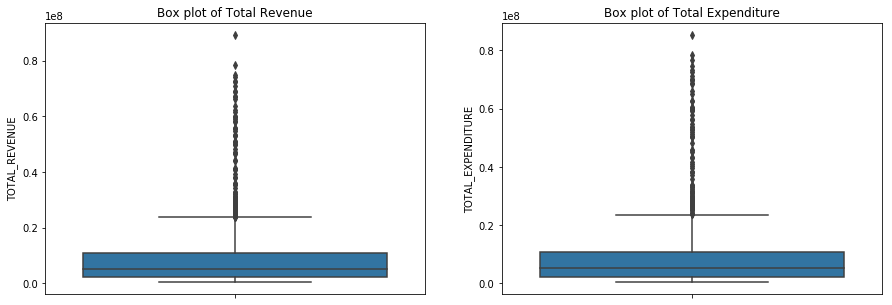

In [33]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(y=useducation_df['TOTAL_REVENUE'].dropna())
plt.title("Box plot of Total Revenue")

plt.subplot(1,2,2)
sns.boxplot(y=useducation_df['TOTAL_EXPENDITURE'].dropna())
plt.title("Box plot of Total Expenditure")
plt.show()

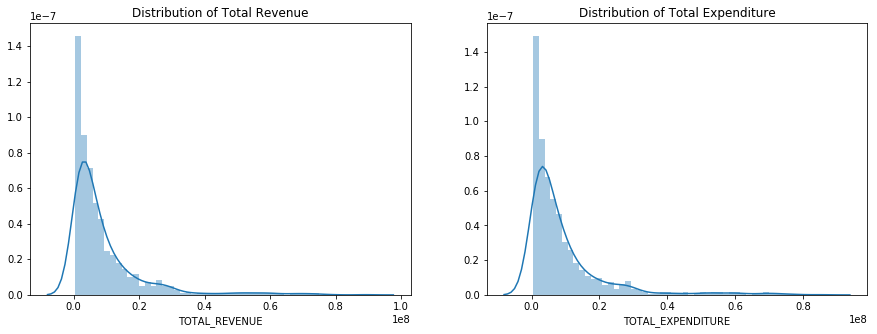

In [36]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(useducation_df['TOTAL_REVENUE'].dropna())
plt.title("Distribution of Total Revenue")

plt.subplot(1,2,2)
sns.distplot(useducation_df['TOTAL_EXPENDITURE'].dropna())
plt.title("Distribution of Total Expenditure")
plt.show()

The data is positively skewed (money).

### Question 2

If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

#### Winsorization 

In [101]:
winsorized_revenue = winsorize(useducation_df['TOTAL_REVENUE'].dropna(), (0, 0.05))
winsorized_expenditure = winsorize(useducation_df['TOTAL_EXPENDITURE'].dropna(), (0, 0.05))

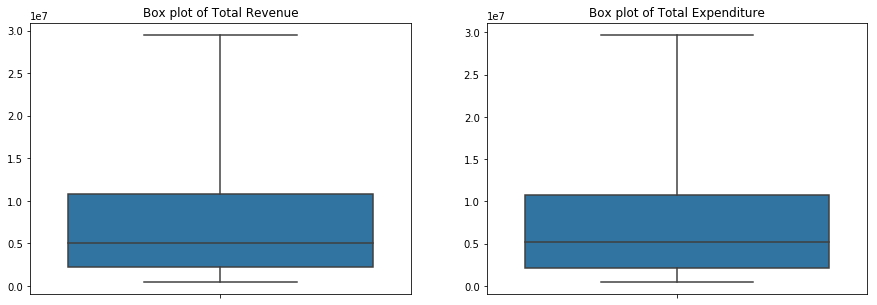

In [111]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(y=winsorized_revenue, whis=5)
plt.title("Box plot of Total Revenue")

plt.subplot(1,2,2)
sns.boxplot(y=winsorized_expenditure, whis=5)
plt.title("Box plot of Total Expenditure")
plt.show()

#### Log Transformation for total revenue

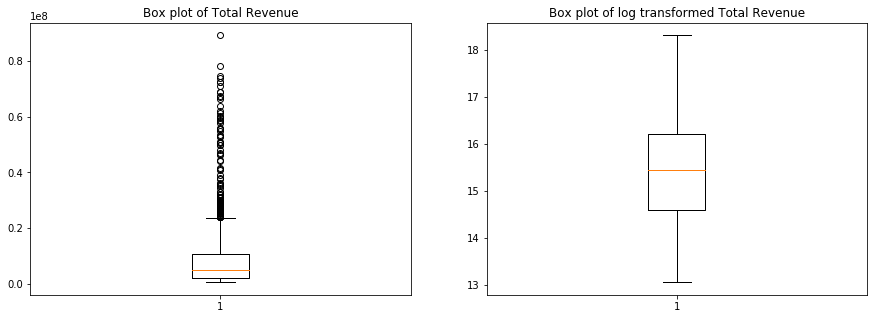

In [103]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(useducation_df['TOTAL_REVENUE'].dropna())
plt.title("Box plot of Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(np.log(useducation_df['TOTAL_REVENUE'].dropna()))
plt.title("Box plot of log transformed Total Revenue")
plt.show()

#### Log Transformation for total expenditure

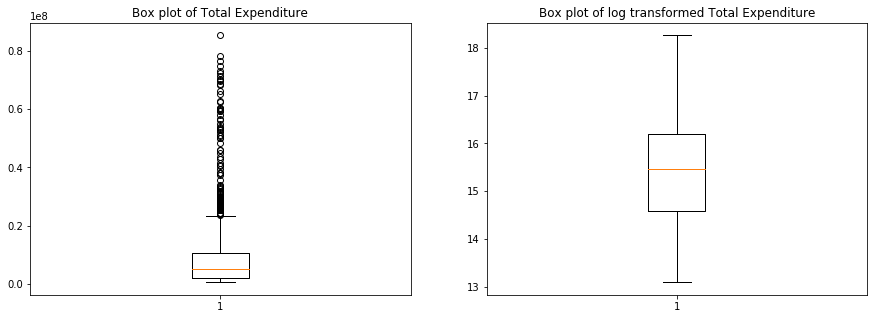

In [104]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(useducation_df['TOTAL_EXPENDITURE'].dropna())
plt.title("Box plot of Total Expenditure")

plt.subplot(1,2,2)
plt.boxplot(np.log(useducation_df['TOTAL_EXPENDITURE'].dropna()))
plt.title("Box plot of log transformed Total Expenditure")
plt.show()

### Budget Deficit 

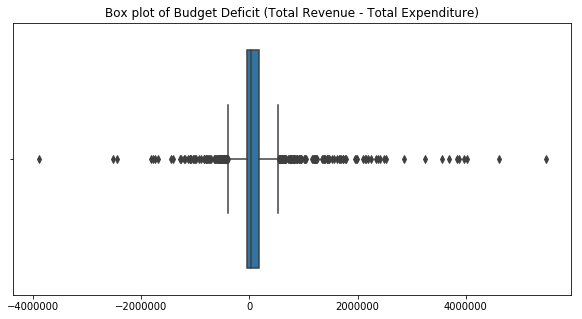

In [105]:
budget_def = useducation_df['TOTAL_EXPENDITURE'] - useducation_df['TOTAL_REVENUE']

plt.figure(figsize = (10,5))

sns.boxplot(budget_def.dropna())
plt.title("Box plot of Budget Deficit (Total Revenue - Total Expenditure)")
plt.show()

#### Winsorize Budget Deficit

In [116]:
budget_def_winsorize = winsorize(budget_def.dropna(), (0.05, 0.05))

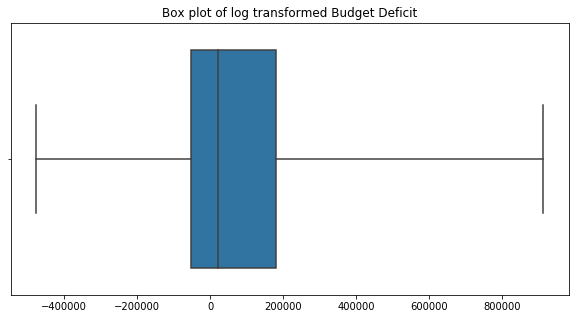

In [117]:
plt.figure(figsize = (10,5))

sns.boxplot(budget_def_winsorize, whis=5)
plt.title("Box plot of log transformed Budget Deficit")
plt.show()

### Winsorized Total Expenditure - Total Revenue

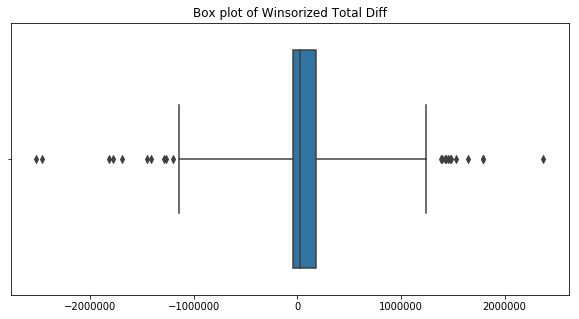

In [119]:
tot_diff = winsorized_expenditure - winsorized_revenue

plt.figure(figsize = (10,5))

sns.boxplot(tot_diff,whis=5)
plt.title("Box plot of Winsorized Total Diff")
plt.show()

#### Winsorized Total Diff

In [120]:
winsorize_tot_diff = winsorize(tot_diff, (0.05, 0.05))

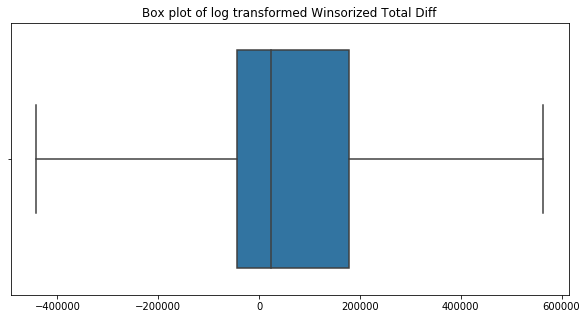

In [125]:
plt.figure(figsize = (10,5))

sns.boxplot(winsorize_tot_diff,whis=5)
plt.title("Box plot of log transformed Winsorized Total Diff")
plt.show()

## Descriptive Statistics to compare Winsorized Tot Diff & Budget Deficit

#### Budget Deficit

In [129]:
pd.DataFrame(budget_def_winsorize).describe()

,0
count,1280.000000
mean,77939.304688
std,306612.312216
min,-476485.000000
25%,-51304.250000
50%,21484.000000
75%,181685.750000
max,912174.000000


#### Log Transform of Winsorized Total Difference

In [127]:
pd.DataFrame(winsorize_tot_diff).describe()

,0
count,1280.000000
mean,49230.031250
std,229820.983748
min,-442351.000000
25%,-44622.250000
50%,23787.500000
75%,178431.000000
max,563852.000000
